<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team-1/blob/main/Modulo3/Semana4_Actividad4_Team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ACTIVIDAD 4

In [ ]:
#load the dataset

#path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [1]:
import os
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
df=pd.read_csv("/content/drive/Shareddrives/DataScienceTeam1/Actividad3_DataSet.csv", index_col = 0)
df.index.name=None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,0.0,0.0,0.0,0.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,0.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,0.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


After review that the data is cleaned, the next steps id to see the description of the data set, to see where we can apply normalizacion

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,29995.0,167495.571929,129751.669805,10000.0,50000.0,140000.0,240000.0,1000000.0
X2,29995.0,1.603767,0.489122,1.0,1.0,2.0,2.0,2.0
X3,29995.0,1.842340,0.744687,1.0,1.0,2.0,2.0,4.0
X4,29995.0,1.557426,0.521519,1.0,1.0,2.0,2.0,3.0
X5,29995.0,35.482580,9.214719,21.0,28.0,34.0,41.0,79.0
X6,29995.0,0.356693,0.760531,0.0,0.0,0.0,0.0,8.0
X7,29995.0,0.319953,0.801670,0.0,0.0,0.0,0.0,8.0
X8,29995.0,0.303717,0.789280,0.0,0.0,0.0,0.0,8.0
X9,29995.0,0.258610,0.760974,0.0,0.0,0.0,0.0,8.0
X10,29995.0,0.221337,0.717557,0.0,0.0,0.0,0.0,8.0


#Dont load this !!
We suggest to normalize X12 to X23

In [ ]:
#lets difine the normalize function
def normalize(x):
    min = np.min(x)
    max = np.max(x)
    range = max - min
    return [(a - min) / range for a in x]

In [ ]:
ndf = df.copy()

In [ ]:
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
columnas = ['X12','X13','X14','X15','X16','X17','X18','X19','X20', 'X21', 'X22', 'X23']

for i in columnas:
  ndf[i] = normalize(ndf[i])

ndf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
X1,29995.0,167495.571929,129751.669805,10000.0,50000.000000,140000.000000,240000.000000,1000000.0
X2,29995.0,1.603767,0.489122,1.0,1.000000,2.000000,2.000000,2.0
X3,29995.0,1.842340,0.744687,1.0,1.000000,2.000000,2.000000,4.0
X4,29995.0,1.557426,0.521519,1.0,1.000000,2.000000,2.000000,3.0
X5,29995.0,35.482580,9.214719,21.0,28.000000,34.000000,41.000000,79.0
X6,29995.0,0.356693,0.760531,0.0,0.000000,0.000000,0.000000,8.0
X7,29995.0,0.319953,0.801670,0.0,0.000000,0.000000,0.000000,8.0
X8,29995.0,0.303717,0.789280,0.0,0.000000,0.000000,0.000000,8.0
X9,29995.0,0.258610,0.760974,0.0,0.000000,0.000000,0.000000,8.0
X10,29995.0,0.221337,0.717557,0.0,0.000000,0.000000,0.000000,8.0


#Start here

Let identify if the data structure. Above we can see that we dont have catogorical values, we have 1 int, and 23 float

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29995 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29995 non-null  int64  
 1   X2      29995 non-null  float64
 2   X3      29995 non-null  float64
 3   X4      29995 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29995 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29995 non-null  float64
 8   X9      29995 non-null  float64
 9   X10     29995 non-null  float64
 10  X11     29995 non-null  float64
 11  X12     29995 non-null  float64
 12  X13     29995 non-null  float64
 13  X14     29995 non-null  float64
 14  X15     29995 non-null  float64
 15  X16     29995 non-null  float64
 16  X17     29995 non-null  float64
 17  X18     29995 non-null  float64
 18  X19     29995 non-null  float64
 19  X20     29995 non-null  float64
 20  X21     29995 non-null  float64
 21  X22     29995 non-null  float64
 22

Lets see the correlation between the variables

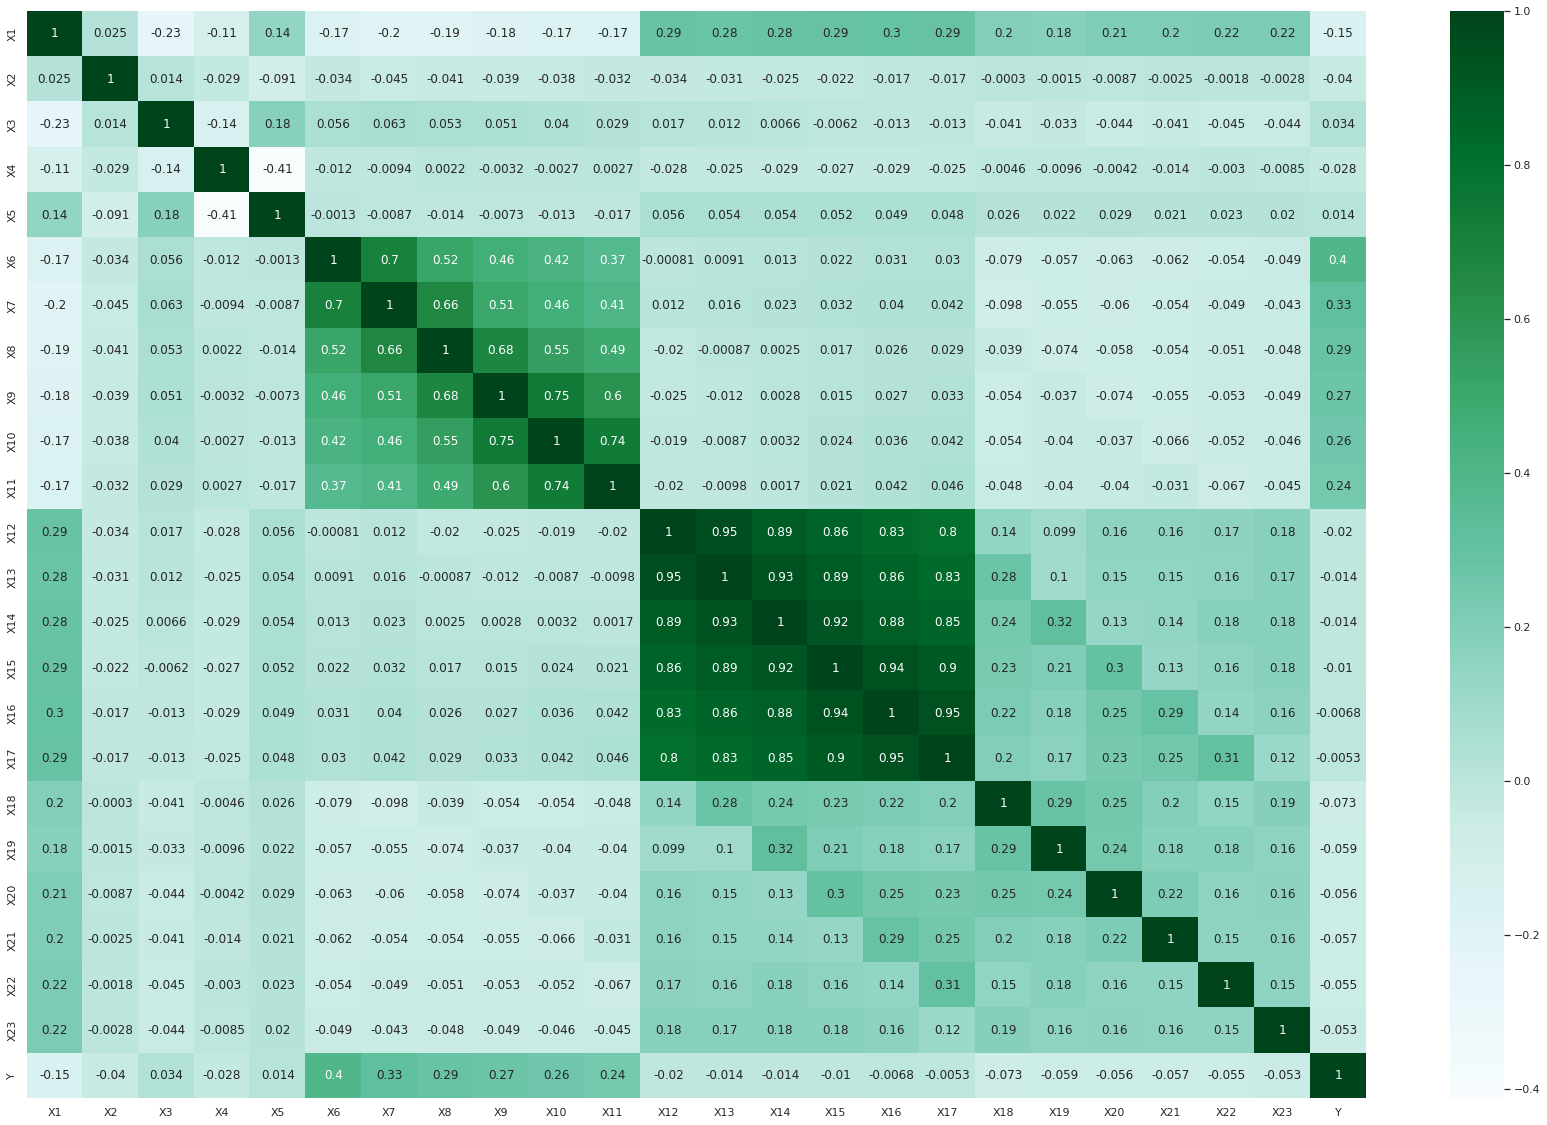

In [14]:
import seaborn as sns

correlation = df.corr()
sns.set(rc = {'figure.figsize': (30,20)})
sns.heatmap(correlation, annot = True, cmap = "BuGn") 

We need to normalized the variable before applied PCA

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)                              

In [37]:
scaled_df = pd.DataFrame(scaled, columns = df.columns)
scaled_df.head().transpose()

,0,1,2,3,4
X1,-1.136772,-0.366056,-0.597271,-0.905557,-0.905557
X2,0.810103,0.810103,0.810103,0.810103,-1.234411
X3,0.211716,0.211716,0.211716,0.211716,0.211716
X4,-1.068869,0.848638,0.848638,-1.068869,-1.068869
X5,-1.246134,-1.029086,-0.160895,0.164676,2.335153
X6,2.160773,-0.469013,-0.469013,-0.469013,-0.469013
X7,2.095717,2.095717,-0.399115,-0.399115,-0.399115
X8,-0.384810,-0.384810,-0.384810,-0.384810,-0.384810
X9,-0.339846,-0.339846,-0.339846,-0.339846,-0.339846
X10,-0.308464,-0.308464,-0.308464,-0.308464,-0.308464


Lets get the Variance, Max value and Min from the Dataframe

In [38]:
summary = {
    "Variance" :scaled_df.var(),
    "Max Value" :scaled_df.max(),
    "Min Value" :scaled_df.min()
                                  
}
pd.DataFrame(summary)

,Variance,Max Value,Min Value
X1,1.000033,6.416243,-1.213843
X2,1.000033,0.810103,-1.234411
X3,1.000033,2.897454,-1.131153
X4,1.000033,2.766146,-1.068869
X5,1.000033,4.722678,-1.571705
X6,1.000033,10.050131,-0.469013
X7,1.000033,9.580215,-0.399115
X8,1.000033,9.751183,-0.384810
X9,1.000033,10.173173,-0.339846
X10,1.000033,10.840665,-0.308464


Apply PCA

In [40]:
from sklearn.decomposition import PCA

pcs = PCA()

pcs_t = pcs.fit_transform(scaled_df)

In [45]:
pcsSummary_df = pd.DataFrame({
                            '% Explained variance': np.round(pcs.explained_variance_ratio_,4)*100,
                            '% Acumalative variance': np.cumsum(pcs.explained_variance_ratio_)*100,

                            })
pcsSummary_df

PCLabel=[]
for i in range(len(scaled_df.columns)):
  PCLabel.append(f'PC{i + 1}' )

pcsSummary_df.index = PCLabel
pcsSummary_df

,% Explained variance,% Acumalative variance
PC1,24.71,24.706402
PC2,17.07,41.778718
PC3,6.92,48.697448
PC4,6.32,55.015852
PC5,4.39,59.404782
PC6,4.30,63.701342
PC7,4.19,67.891951
PC8,3.74,71.628505
PC9,3.68,75.312496
PC10,3.62,78.933638
